In [326]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from pandas import Series,DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [327]:
w1= pd.read_csv(r'D:\ALY6020\1\adult-all.csv',header = None,names=['age','workclass','fnlwgt','education','education-num','marital-staus','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary'])
w2=pd.DataFrame(w1)
w2.head(5) # in order to clearify the meaning of the data, add header in the data.

,age,workclass,fnlwgt,education,education-num,marital-staus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [328]:
w2.drop(columns='fnlwgt',inplace = True) # According to guide of data description, ignore this column
w2.head(5)

,age,workclass,education,education-num,marital-staus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [329]:
w2.info() #Check the type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-staus   48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  Salary          48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [301]:
#w2.duplicated(keep=False) check duplicate row of data, but in knn model, I do not think need to do this befcause all data will influence model 

In [302]:
#w2.drop_duplicates(keep='first',inplace=True)

In [303]:
#w2

In [304]:
#w2.reset_index(drop = True )

In [305]:
w2=w2.replace(to_replace='?', value=np.NaN) # replace ? to NaN
np.any(pd.isnull(w2))   #estimate exist of NaN

True

In [306]:
col_null= w2.isnull().sum(axis=0) # count all NaN data

In [307]:
col_null

age                  0
workclass         2799
education            0
education-num        0
marital-staus        0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
Salary               0
dtype: int64

In [308]:
w2['workclass'] = w2['workclass'].fillna(w2['workclass'].mode()[0])
w2['occupation'] = w2['occupation'].fillna(w2['occupation'].mode()[0])
w2['native-country'] = w2['native-country'].fillna(w2['native-country'].mode()[0])
col_null= w2.isnull().sum(axis=0)
col_null

age               0
workclass         0
education         0
education-num     0
marital-staus     0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

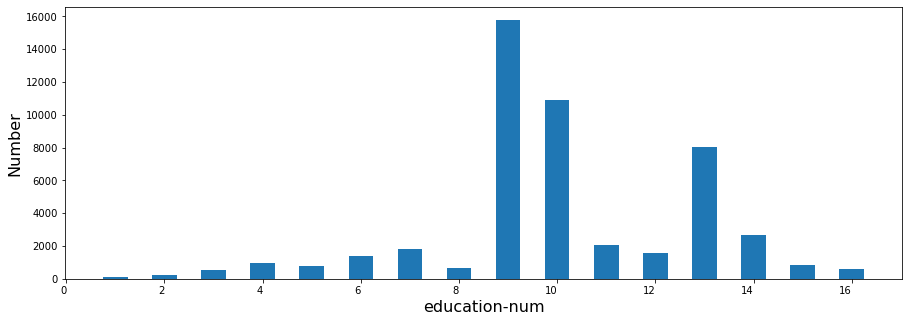

In [309]:

m1 = w2['education-num'].value_counts() 
fig = plt.figure(figsize=(15,5))
plt.bar(m2.index,m1.values,width=0.5)
plt.xticks(ha='right')
plt.ylabel('Number',fontsize=16)
plt.xlabel('education-num',fontsize=16)
plt.show()

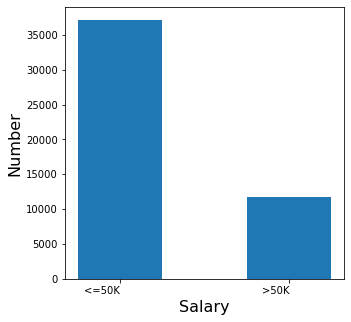

In [330]:
m1 = w2['Salary'].value_counts() 
fig = plt.figure(figsize=(5,5))
plt.bar(m1.index,m1.values,width=0.5)
plt.xticks(ha='right')
plt.ylabel('Number',fontsize=16)
plt.xlabel('Salary',fontsize=16)
plt.show()

In [311]:
data = w2.iloc[:,:-1].copy()
data.head()

,age,workclass,education,education-num,marital-staus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [312]:
target = w2['Salary'].copy()
target.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: Salary, dtype: object

In [313]:
cols = ['workclass','education','marital-staus','occupation','relationship','race','sex','native-country']

def convert_item(item):
    return np.argwhere(uni == item)[0,0]
for col in cols:
    uni = data[col].unique()
    data[col] = data[col].map(convert_item)

data.head(10)

,age,workclass,education,education-num,marital-staus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,0,13,1,1,1,0,0,0,0,13,0
2,38,2,1,9,2,2,0,0,0,0,0,40,0
3,53,2,2,7,1,2,1,1,0,0,0,40,0
4,28,2,0,13,1,3,2,1,1,0,0,40,1
5,37,2,3,14,1,1,2,0,1,0,0,40,0
6,49,2,4,5,3,4,0,1,1,0,0,16,2
7,52,1,1,9,1,1,1,0,0,0,0,45,0
8,31,2,3,14,0,3,0,0,1,14084,0,50,0
9,42,2,0,13,1,1,1,0,0,5178,0,40,0


In [354]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.3,random_state=1)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8402374940285265

In [349]:
from sklearn.model_selection import GridSearchCV
model=knn = KNeighborsClassifier()

In [350]:
param_grid = [{'n_neighbors': list(range(1,100))}]

In [351]:
grid_search = GridSearchCV(model,param_grid,cv=5,
                           scoring='f1_macro')

In [352]:
grid_search.fit(x_train,y_train)
print('the best k',grid_search.best_params_)


the best k {'n_neighbors': 9}


Feature: 0, Score: 59.93619
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 24.17930
Feature: 4, Score: -0.00000
Feature: 5, Score: 78.44158
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 26.44609
Feature: 10, Score: -0.00000
Feature: 11, Score: 25.60356
Feature: 12, Score: 0.00000


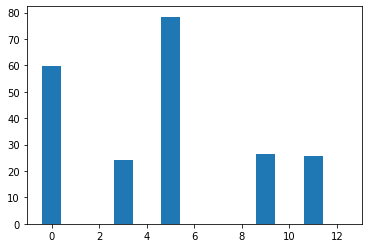

1.0

In [357]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=48842, n_features=13, n_informative=5,n_targets=1, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
   print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

model.score(X,y)